Initial memory usage: 2075.70 MB

Memory usage before loading data: 2075.70 MB
                                    FlowID       SourceIP  SourcePort  \
0   192.168.10.5-211.233.74.132-58565-80-6   192.168.10.5       58565   
1   192.168.10.3-192.168.10.14-53-52520-17  192.168.10.14       52520   
2      172.16.0.1-192.168.10.50-39234-80-6     172.16.0.1       39234   
3  192.168.10.25-104.97.133.94-55588-443-6  192.168.10.25       55588   
4  157.240.18.35-192.168.10.15-443-54074-6  192.168.10.15       54074   

    DestinationIP  DestinationPort  Protocol            Timestamp  \
0  211.233.74.132               80         6        6/7/2017 4:55   
1    192.168.10.3               53        17        7/7/2017 1:57   
2   192.168.10.50               80         6       5/7/2017 10:45   
3   104.97.133.94              443         6  03/07/2017 10:55:48   
4   157.240.18.35              443         6       4/7/2017 11:47   

   FlowDuration  TotalFwdPackets  TotalBackwardPackets  ...  \
0   

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier F1 Score: 0.9997

Memory usage after getting predictions from base models: 3761.95 MB

Memory usage before calculating correlation matrix: 3761.95 MB

--- Correlation Matrix of Base Model Predictions ---
                        XGBClassifier  DecisionTreeClassifier  \
XGBClassifier                1.000000                0.999457   
DecisionTreeClassifier       0.999457                1.000000   
RandomForestClassifier       0.999324                0.999324   
LGBMClassifier               0.999400                0.998981   

                        RandomForestClassifier  LGBMClassifier  
XGBClassifier                         0.999324        0.999400  
DecisionTreeClassifier                0.999324        0.998981  
RandomForestClassifier                1.000000        0.998892  
LGBMClassifier                        0.998892        1.000000  

Displaying Correlation Heatmap...


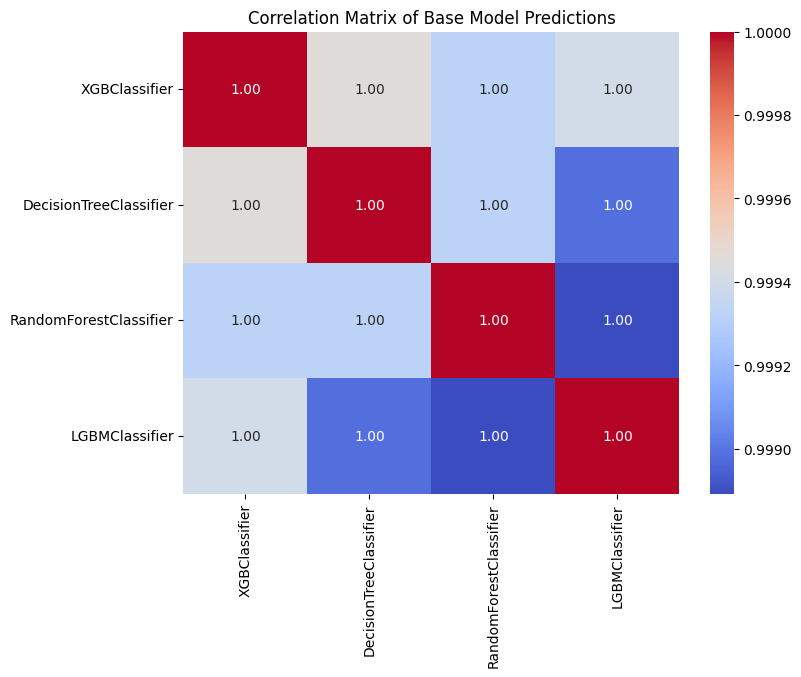

Memory usage after calculating and showing correlation matrix: 3718.40 MB
Memory usage after deleting predictions DataFrame: 3718.40 MB

Memory usage before Hard Voting: 3718.40 MB

--- Hard Voting ---
Accuracy: 0.9998874463611565
F1 Score: 0.9998874520954096
Memory usage before Hard Voting Confusion Matrix: 3712.45 MB

Confusion Matrix (Hard Voting):
[[145411     15]
 [    57 494212]]
TN: 145411, FP: 15, FN: 57, TP: 494212

Displaying Hard Voting Confusion Matrix Heatmap...


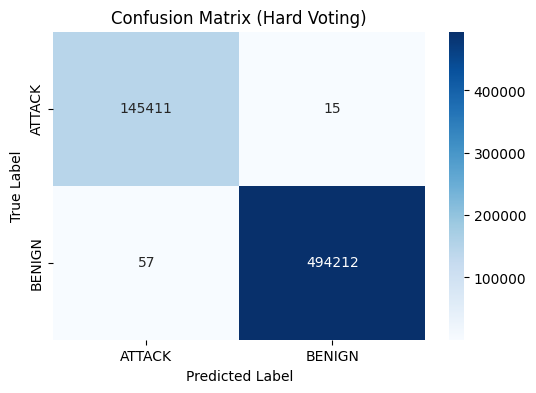

Memory usage after Hard Voting Confusion Matrix: 3712.45 MB
Memory usage after Hard Voting: 3712.45 MB

Memory usage before Weighted Voting: 3712.45 MB

--- Weighted Voting ---
Accuracy: 0.9998858831161725
F1 Score: 0.9998858865771362
Memory usage before Weighted Voting Confusion Matrix: 3712.45 MB

Confusion Matrix (Weighted Voting):
[[145402     24]
 [    49 494220]]
TN: 145402, FP: 24, FN: 49, TP: 494220

Displaying Weighted Voting Confusion Matrix Heatmap...


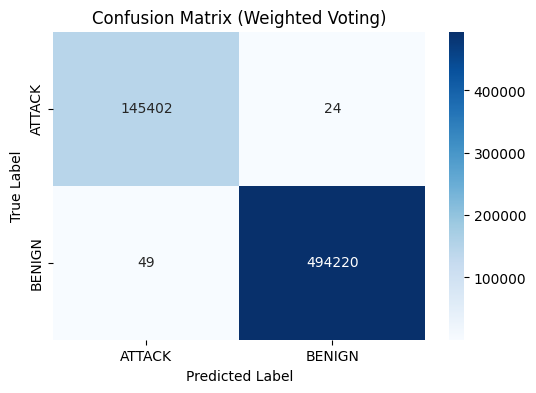

Memory usage after Weighted Voting Confusion Matrix: 3712.45 MB
Memory usage after Weighted Voting: 3712.45 MB

Memory usage before Stacking: 3712.45 MB

--- Stacking ---
Accuracy: 0.999874940401285
F1 Score: 0.9998749361521159
Memory usage before Stacking Confusion Matrix: 3711.45 MB

Confusion Matrix (Stacking):
[[145372     54]
 [    26 494243]]
TN: 145372, FP: 54, FN: 26, TP: 494243

Displaying Stacking Confusion Matrix Heatmap...


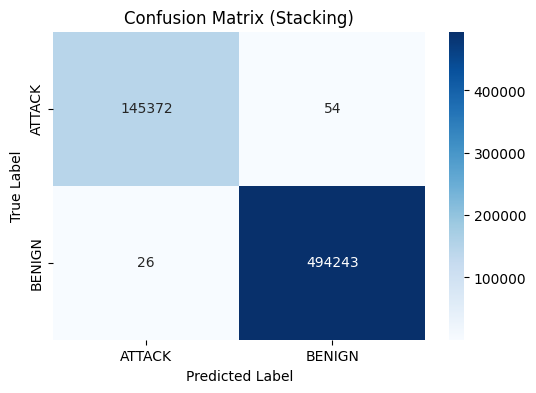

Memory usage after Stacking Confusion Matrix: 3710.59 MB
Memory usage after Stacking: 3710.59 MB

Final memory usage before script finishes: 3710.59 MB


In [2]:
#LATEST- With Binary class
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix # Ensure confusion_matrix is imported
from sklearn.linear_model import LogisticRegression
from scipy.stats import mode
import psutil # Import psutil for memory monitoring
import os     # Import os for process id
import seaborn as sns # Import seaborn for correlation heatmap (optional, but good for visualization)
import matplotlib.pyplot as plt # Import matplotlib for plotting (optional)


# --- Memory Usage Monitoring Helper ---
process = psutil.Process(os.getpid())

def get_memory_usage():
    """Returns current memory usage of the process in MB."""
    mem_info = process.memory_info()
    return mem_info.rss / (1024 * 1024) # Convert bytes to MB

print(f"Initial memory usage: {get_memory_usage():.2f} MB")


# === Load Data ===
print(f"\nMemory usage before loading data: {get_memory_usage():.2f} MB")
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')
print(df_test.head())
print(f"Memory usage after loading data: {get_memory_usage():.2f} MB")


# === Convert to Binary Classes: 'BENIGN' and 'ATTACK' ===
print(f"\nMemory usage before converting to binary labels: {get_memory_usage():.2f} MB")
df_train['Label'] = df_train['Label'].apply(lambda x: 'BENIGN' if x == 'BENIGN' else 'ATTACK')
df_test['Label'] = df_test['Label'].apply(lambda x: 'BENIGN' if x == 'BENIGN' else 'ATTACK')
print(f"Memory usage after converting to binary labels: {get_memory_usage():.2f} MB")


# === Feature/Label Separation ===
print(f"\nMemory usage before separating features and labels: {get_memory_usage():.2f} MB")
drop_cols = ['Label', 'FlowID', 'SourceIP', 'DestinationIP', 'Timestamp']
X_train = df_train.drop(columns=drop_cols)
y_train = df_train['Label']
X_test = df_test.drop(columns=drop_cols)
y_test = df_test['Label']
print(f"Memory usage after separating features and labels: {get_memory_usage():.2f} MB")

# --- Delete raw dataframes to free up memory ---
del df_train
del df_test
print(f"Memory usage after deleting raw dataframes: {get_memory_usage():.2f} MB")


# === Preprocessing ===
print(f"\nMemory usage before scaling: {get_memory_usage():.2f} MB")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Memory usage after scaling: {get_memory_usage():.2f} MB")

print(f"\nMemory usage before encoding labels: {get_memory_usage():.2f} MB")
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
print(f"Memory usage after encoding labels: {get_memory_usage():.2f} MB")

# --- Delete original feature/label dataframes to free up memory ---
del X_train
del y_train
del X_test
del y_test
print(f"Memory usage after deleting original feature/label dataframes: {get_memory_usage():.2f} MB")


# === Print Encoded Class Labels ===
print("\nClass labels (label -> encoded value):")
for i, label in enumerate(le.classes_):
    print(f"{label} -> {i}")
class_labels = le.classes_ # Store class labels for confusion matrix heatmap annotations

# === Load Models ===
print(f"\nMemory usage before loading models: {get_memory_usage():.2f} MB")
with open('XGBoost.pkl', 'rb') as f:
    model1 = pickle.load(f)
with open('Decision_Tree.pkl', 'rb') as f:
    model2 = pickle.load(f)
with open('Random_Forest.pkl', 'rb') as f:
    model3 = pickle.load(f)
with open('LightGBM.pkl', 'rb') as f:
    model4 = pickle.load(f)

models = [model1, model2, model3, model4]
print(f"Memory usage after loading models: {get_memory_usage():.2f} MB")


# === Get Predictions from Models ===
print(f"\nMemory usage before getting predictions from base models: {get_memory_usage():.2f} MB")
predictions = []
f1_scores = []
model_names = [] # Store model names for correlation matrix

for i, model in enumerate(models):
    model_name = type(model).__name__ # Use actual model class name
    model_names.append(model_name)
    print(f"Getting predictions for {model_name}...")
    pred = model.predict(X_test_scaled)

    # Encode predictions if they are strings
    if isinstance(pred[0], (str, np.str_)): # Check for string or numpy string type
        print(f"Encoding string predictions from {model_name}")
        pred = le.transform(pred)

    predictions.append(pred)
    f1 = f1_score(y_test_encoded, pred, average='weighted')
    f1_scores.append(f1)
    print(f"{model_name} F1 Score: {f1:.4f}")

predictions = np.array(predictions)  # Shape: (n_models, n_samples)
print(f"\nMemory usage after getting predictions from base models: {get_memory_usage():.2f} MB")


# === Show Correlation Matrix of Predictions ===
print(f"\nMemory usage before calculating correlation matrix: {get_memory_usage():.2f} MB")
# Create a DataFrame from predictions with model names as columns
predictions_df = pd.DataFrame(predictions.T, columns=model_names)

# Calculate the correlation matrix
correlation_matrix = predictions_df.corr()

print("\n--- Correlation Matrix of Base Model Predictions ---")
print(correlation_matrix)

# --- Display correlation heatmap ---
print("\nDisplaying Correlation Heatmap...")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Base Model Predictions')
plt.show()


print(f"Memory usage after calculating and showing correlation matrix: {get_memory_usage():.2f} MB")

# --- Delete predictions DataFrame to free up memory ---
del predictions_df
print(f"Memory usage after deleting predictions DataFrame: {get_memory_usage():.2f} MB")


# === A. Hard Voting ===
print(f"\nMemory usage before Hard Voting: {get_memory_usage():.2f} MB")
y_pred_hard, _ = mode(predictions, axis=0)
y_pred_hard = y_pred_hard.ravel()
print("\n--- Hard Voting ---")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_hard))
print("F1 Score:", f1_score(y_test_encoded, y_pred_hard, average='weighted'))
# Sample Hard Voting Predictions (decoded) might cause memory issues for large arrays
# print("Sample Hard Voting Predictions (decoded):", le.inverse_transform(y_pred_hard[:10])) # Print only first 10 samples

# --- Confusion Matrix for Hard Voting ---
print(f"Memory usage before Hard Voting Confusion Matrix: {get_memory_usage():.2f} MB")
cm_hard = confusion_matrix(y_test_encoded, y_pred_hard)
print("\nConfusion Matrix (Hard Voting):")
print(cm_hard)
print(f"TN: {cm_hard[0, 0]}, FP: {cm_hard[0, 1]}, FN: {cm_hard[1, 0]}, TP: {cm_hard[1, 1]}")

# --- Visualize Hard Voting Confusion Matrix ---
print("\nDisplaying Hard Voting Confusion Matrix Heatmap...")
plt.figure(figsize=(6, 4))
sns.heatmap(cm_hard, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (Hard Voting)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(f"Memory usage after Hard Voting Confusion Matrix: {get_memory_usage():.2f} MB")

print(f"Memory usage after Hard Voting: {get_memory_usage():.2f} MB")


# === B. Weighted Voting ===
print(f"\nMemory usage before Weighted Voting: {get_memory_usage():.2f} MB")
weights = np.array(f1_scores)
weights /= weights.sum()  # Normalize

n_classes = len(np.unique(y_test_encoded))
weighted_votes = np.zeros((len(X_test_scaled), n_classes))

for i, pred in enumerate(predictions):
    for j, label in enumerate(pred):
        weighted_votes[j, label] += weights[i]

y_pred_weighted = np.argmax(weighted_votes, axis=1)
print("\n--- Weighted Voting ---")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_weighted))
print("F1 Score:", f1_score(y_test_encoded, y_pred_weighted, average='weighted'))
# print("Sample Weighted Voting Predictions (decoded):", le.inverse_transform(y_pred_weighted[:10])) # Print only first 10 samples

# --- Confusion Matrix for Weighted Voting ---
print(f"Memory usage before Weighted Voting Confusion Matrix: {get_memory_usage():.2f} MB")
cm_weighted = confusion_matrix(y_test_encoded, y_pred_weighted)
print("\nConfusion Matrix (Weighted Voting):")
print(cm_weighted)
print(f"TN: {cm_weighted[0, 0]}, FP: {cm_weighted[0, 1]}, FN: {cm_weighted[1, 0]}, TP: {cm_weighted[1, 1]}")

# --- Visualize Weighted Voting Confusion Matrix ---
print("\nDisplaying Weighted Voting Confusion Matrix Heatmap...")
plt.figure(figsize=(6, 4))
sns.heatmap(cm_weighted, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (Weighted Voting)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(f"Memory usage after Weighted Voting Confusion Matrix: {get_memory_usage():.2f} MB")

print(f"Memory usage after Weighted Voting: {get_memory_usage():.2f} MB")

# === C. Stacking ===
print(f"\nMemory usage before Stacking: {get_memory_usage():.2f} MB")

# Use the existing 'predictions' array for meta_X
meta_X = predictions.T
meta_y = y_test_encoded # True labels for the meta-model training/evaluation are the same as y_test_encoded

stack_model = LogisticRegression(max_iter=1000)
# For stacking training, it's ideal to use out-of-fold predictions to avoid overfitting the meta-model
# This code uses predictions on the test set directly, which is a simplified approach for demonstration.
# A proper stacking implementation would involve splitting the training data further.
stack_model.fit(meta_X, meta_y)
y_pred_stack = stack_model.predict(meta_X) # Predicting on the same meta_X used for training (simplified)

print("\n--- Stacking ---")
print("Accuracy:", accuracy_score(meta_y, y_pred_stack))
print("F1 Score:", f1_score(meta_y, y_pred_stack, average='weighted'))
# print("Sample Stacking Predictions (decoded):", le.inverse_transform(y_pred_stack[:10])) # Print only first 10 samples

# --- Confusion Matrix for Stacking ---
print(f"Memory usage before Stacking Confusion Matrix: {get_memory_usage():.2f} MB")
cm_stack = confusion_matrix(meta_y, y_pred_stack) # Note: Using meta_y as true labels for stacking
print("\nConfusion Matrix (Stacking):")
print(cm_stack)
print(f"TN: {cm_stack[0, 0]}, FP: {cm_stack[0, 1]}, FN: {cm_stack[1, 0]}, TP: {cm_stack[1, 1]}")

# --- Visualize Stacking Confusion Matrix ---
print("\nDisplaying Stacking Confusion Matrix Heatmap...")
plt.figure(figsize=(6, 4))
sns.heatmap(cm_stack, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (Stacking)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(f"Memory usage after Stacking Confusion Matrix: {get_memory_usage():.2f} MB")

print(f"Memory usage after Stacking: {get_memory_usage():.2f} MB")


# --- Now delete the predictions array and related large objects if needed ---
del predictions
del meta_X
del meta_y # meta_y is just a reference, but good practice
del y_pred_hard
del y_pred_weighted
del y_pred_stack
del weighted_votes # Delete this large temporary array


print(f"\nFinal memory usage before script finishes: {get_memory_usage():.2f} MB")